In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
face_cascade_ocv = cv2.CascadeClassifier('./models/opencv-cascade/haarcascade_frontalface_alt.xml')
img_bgr = cv2.imread('./my_face.jpeg', 1)
show = img_bgr.copy()

print ('Input img size:',img_bgr.shape)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
bbox_faces = face_cascade_ocv.detectMultiScale(img_gray, 1.3, 5) # x,y,w,h


Input img size: (960, 960, 3)


Number of faces: 0
Bounding box: (10, 10, 100, 100)


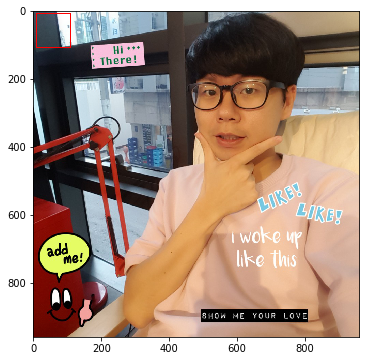

CPU times: user 373 ms, sys: 17.5 ms, total: 390 ms
Wall time: 394 ms


In [3]:
%%time
print ('Number of faces: %d'%len(bbox_faces))

for (x,y,w,h) in bbox_faces:
    cv2.rectangle(show, (x,y),(x+w,y+h), (128,255,0),2)
    # cropped_img = img_bgr[x:x+w, y:y+h]
    bbox = (x,y,w,h)
    cropped_img = img_bgr[y:y+h, x:x+w]

if len(bbox_faces)==0:
    bbox = (10,10,100,100)
    x,y,w,h = bbox
    cv2.rectangle(show, (x,y),(x+w,y+h), (0,0,255),2)
    cropped_img = img_bgr[y:y+h, x:x+w]
    
print ('Bounding box:', bbox)
show = cv2.cvtColor(show, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

Input img size: (2592, 1944, 3)
Number of faces: 1
Bounding box: (1090, 881, 155, 155)


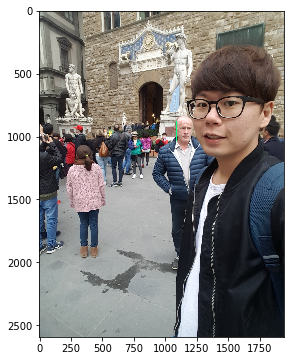

CPU times: user 2.78 s, sys: 128 ms, total: 2.91 s
Wall time: 1.06 s


In [7]:
%%time

img_bgr = cv2.imread('./my_face2.jpg', 1)
show = img_bgr.copy()

print ('Input img size:',img_bgr.shape)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
bbox_faces = face_cascade_ocv.detectMultiScale(img_gray, 1.3, 5) # x,y,w,h

print ('Number of faces: %d'%len(bbox_faces))

for (x,y,w,h) in bbox_faces:
    cv2.rectangle(show, (x,y),(x+w,y+h), (128,255,0),2)
    # cropped_img = img_bgr[x:x+w, y:y+h]
    bbox = (x,y,w,h)
    cropped_img = img_bgr[y:y+h, x:x+w]

if len(bbox_faces)==0:
    bbox = (10,10,100,100)
    x,y,w,h = bbox
    cv2.rectangle(show, (x,y),(x+w,y+h), (0,0,255),2)
    cropped_img = img_bgr[y:y+h, x:x+w]
    
print ('Bounding box:', bbox)
show = cv2.cvtColor(show, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

Using TensorFlow backend.


[ 0.20664045  0.00103301  0.12917419  0.00233706  0.4367016   0.00356058
  0.2205531 ]
label: Sad


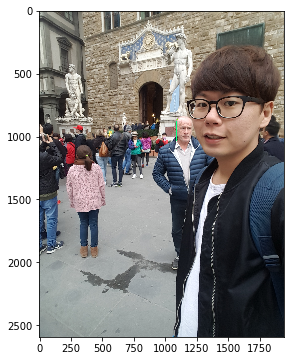

In [8]:
from keras.models import Model, model_from_json
import keras
import xception_model

model = xception_model.XCEPTION()
model.load_weights('./models/xception/weights.20_0.61.h5') #'models/xception/weights.79.h5'

### model input
resized_img = cv2.resize(cropped_img, (48,48))
img_bgr_float = resized_img.astype(np.float32)
img_bgr_float_normalized = 2*(img_bgr_float - 128)/255

### make gray 3ch for xception network
img_cropgray_1ch = cv2.cvtColor(img_bgr_float_normalized, cv2.COLOR_BGR2GRAY)
img_cropgray_3ch = cv2.cvtColor(img_cropgray_1ch, cv2.COLOR_GRAY2BGR)

img_input = np.expand_dims(img_cropgray_3ch, 0)

result = model.predict(img_input, 1)

# result is a softmax value of emotion labels
# the order is same with below dictionary data
print (result[0])

# final label is a order of maximum value
predict_label = np.argmax(result[0])

dict_emotion_label = {0:'Angry',1:'Disgust',2:'Fear',
                      3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

print ('label: %s'%dict_emotion_label[predict_label])

cv2.putText(show, '%s'%dict_emotion_label[predict_label], 
            (bbox_faces[0][0], bbox_faces[0][1]-10),
            cv2.FONT_HERSHEY_DUPLEX, 
            0.5, 
            (127,255,0))
plt.imshow(show)
plt.show()

Input img size: (960, 960, 3)
Number of faces: 0
Bounding box: (10, 10, 100, 100)


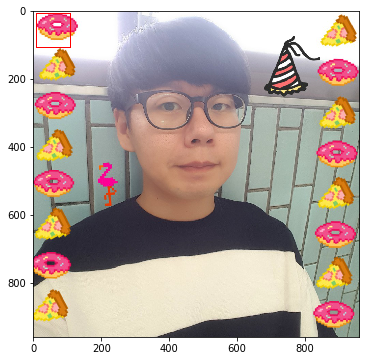

CPU times: user 675 ms, sys: 19.4 ms, total: 695 ms
Wall time: 402 ms


In [5]:
%%time

img_bgr = cv2.imread('./my_face3.jpeg', 1)
show = img_bgr.copy()

print ('Input img size:',img_bgr.shape)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
bbox_faces = face_cascade_ocv.detectMultiScale(img_gray, 1.3, 5) # x,y,w,h

print ('Number of faces: %d'%len(bbox_faces))

for (x,y,w,h) in bbox_faces:
    cv2.rectangle(show, (x,y),(x+w,y+h), (128,255,0),2)
    # cropped_img = img_bgr[x:x+w, y:y+h]
    bbox = (x,y,w,h)
    cropped_img = img_bgr[y:y+h, x:x+w]

if len(bbox_faces)==0:
    bbox = (10,10,100,100)
    x,y,w,h = bbox
    cv2.rectangle(show, (x,y),(x+w,y+h), (0,0,255),2)
    cropped_img = img_bgr[y:y+h, x:x+w]
    
print ('Bounding box:', bbox)
show = cv2.cvtColor(show, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

Input img size: (960, 960, 3)
Number of faces: 0
Bounding box: (10, 10, 100, 100)


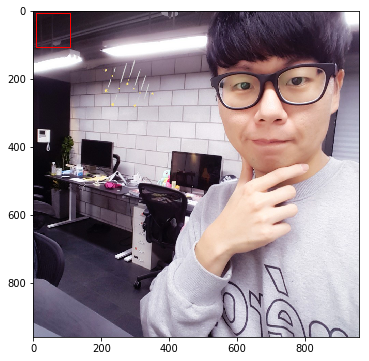

CPU times: user 793 ms, sys: 12.2 ms, total: 806 ms
Wall time: 416 ms


In [6]:
%%time

img_bgr = cv2.imread('./my_face4.jpeg', 1)
show = img_bgr.copy()

print ('Input img size:',img_bgr.shape)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
bbox_faces = face_cascade_ocv.detectMultiScale(img_gray, 1.3, 5) # x,y,w,h

print ('Number of faces: %d'%len(bbox_faces))

for (x,y,w,h) in bbox_faces:
    cv2.rectangle(show, (x,y),(x+w,y+h), (128,255,0),2)
    # cropped_img = img_bgr[x:x+w, y:y+h]
    bbox = (x,y,w,h)
    cropped_img = img_bgr[y:y+h, x:x+w]

if len(bbox_faces)==0:
    bbox = (10,10,100,100)
    x,y,w,h = bbox
    cv2.rectangle(show, (x,y),(x+w,y+h), (0,0,255),2)
    cropped_img = img_bgr[y:y+h, x:x+w]
    
print ('Bounding box:', bbox)
show = cv2.cvtColor(show, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()